In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_parquet('data/Syn-training.parquet')
df = pd.concat([df, pd.read_parquet('data/DNS-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/UDP-testing.parquet')])
df['Label'].value_counts()
# drop the label Benign
# df = df[df['Label'] != 'Benign']

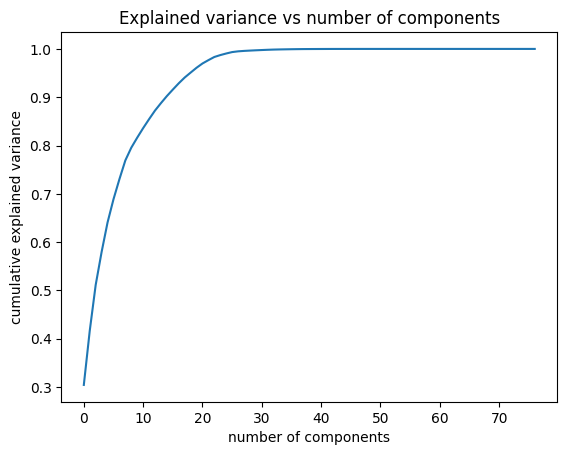

In [16]:
# find the optimal number of components for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df.reset_index(inplace=True, drop=True)


# separate the features from the labels
X = df.drop('Label', axis=1)
y = df['Label']

# standardize the features
X = StandardScaler().fit_transform(X)

# find the optimal number of components
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.show()

In [17]:

# perform PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df.reset_index(inplace=True, drop=True)


# separate the features from the labels
X = df.drop('Label', axis=1)
y = df['Label']

# standardize the features
X = StandardScaler().fit_transform(X)

# perform PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)

# create a dataframe with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component ' + str(i) for i in range(1, 21)])

# concatenate the labels to the dataframe
principalDf = pd.concat([principalDf, df[['Label']]], axis=1)

# print the first 5 rows of the dataframe
principalDf.head()



,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,Label
0,1.774740,0.365138,-4.162486,0.331307,-1.544789,0.034316,-0.050921,-1.831441,0.313125,-0.445290,...,0.129345,0.008460,-0.029653,-0.243377,-0.115811,0.974002,0.011482,0.664103,-0.359201,Syn
1,3.499013,-0.952102,-1.637417,-1.012296,-1.342857,-0.020102,0.423020,-2.985582,0.821048,5.903433,...,0.235792,-0.079260,-0.672865,0.058485,0.232610,-0.382098,0.263247,0.027128,0.013963,Syn
2,-2.774625,-2.423505,0.462584,-0.937537,2.916566,-0.213144,0.636088,0.074734,-0.208508,0.322861,...,0.095225,-0.103987,-0.091684,-0.133110,-0.029039,0.394098,0.345084,-0.616307,0.241153,Syn
3,2.387757,-0.867875,-3.276884,0.504184,-0.454909,-0.273157,-0.020182,-0.153652,0.564059,0.982687,...,-0.024239,-0.208819,0.196658,-1.178640,-0.327550,0.159608,0.988855,0.185662,-0.115257,Syn
4,1.772528,0.364916,-4.181727,0.331253,-1.549615,0.034063,-0.048764,-1.864149,0.321405,-0.498994,...,0.131822,0.015936,-0.024224,-0.170523,-0.101405,0.798833,0.043816,0.601857,-0.325156,Syn


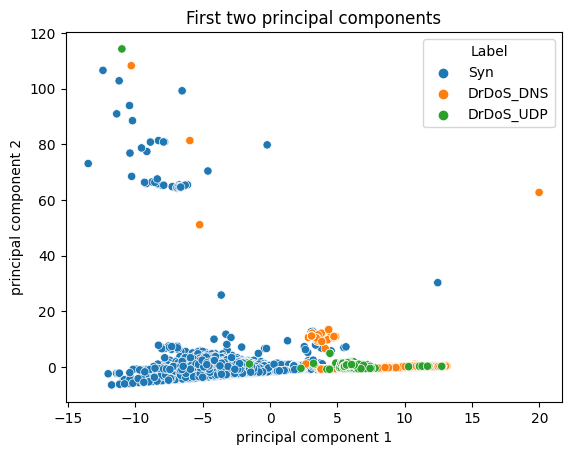

In [18]:
# plot the first two principal components
import seaborn as sns

sns.scatterplot(x='principal component 1', y='principal component 2', hue='Label', data=principalDf)
# plot size
plt.title('First two principal components')
plt.show()



[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 57391 samples in 0.004s...
[t-SNE] Computed neighbors for 57391 samples in 4.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 57391
[t-SNE] Computed conditional probabilities for sample 2000 / 57391
[t-SNE] Computed conditional probabilities for sample 3000 / 57391
[t-SNE] Computed conditional probabilities for sample 4000 / 57391
[t-SNE] Computed conditional probabilities for sample 5000 / 57391
[t-SNE] Computed conditional probabilities for sample 6000 / 57391
[t-SNE] Computed conditional probabilities for sample 7000 / 57391
[t-SNE] Computed conditional probabilities for sample 8000 / 57391
[t-SNE] Computed conditional probabilities for sample 9000 / 57391
[t-SNE] Computed conditional probabilities for sample 10000 / 57391
[t-SNE] Computed conditional probabilities for sample 11000 / 57391
[t-SNE] Computed conditional probabilities for sample 12000 / 57391
[t-SNE] Computed conditional probabilities for sa

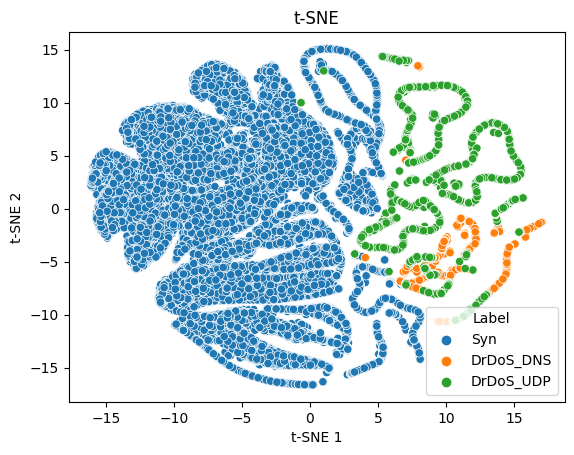

In [19]:
# perform a t-SNE to the principalDf
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(principalDf.drop('Label', axis=1))

# create a dataframe with the t-SNE results
tsneDf = pd.DataFrame(data=tsne_results, columns=['t-SNE 1', 't-SNE 2'])

# concatenate the labels to the dataframe
tsneDf = pd.concat([tsneDf, df[['Label']]], axis=1)

# plot the t-SNE
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Label', data=tsneDf)
# plot size
plt.title('t-SNE')
plt.show()
